# Environment

In [48]:
# System imports
import gc
import os
import sys
import importlib

# Data analysis
import numpy as np
import pandas as pd
import scanpy as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the current working directory
os.chdir('/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SRRM3/Herring')
pd.set_option('display.max_columns', None)

# Local functions
import importlib
from functions import *
importlib.reload(sys.modules['functions'])

<module 'functions' from '/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_SRRM3/Herring/functions.py'>

In [14]:
adata = sc.read_h5ad('./adata_full.h5ad')

In [46]:
print(list(adata.obs['stage_id'].unique()))
print(list(adata.obs['age'].unique()))
print(list(adata.obs['major_clust'].unique()))
print(list(adata.obs['sub_clust'].unique()))

['Neonatal', 'Childhood', 'Infancy', 'Adolescence', 'Fetal', 'Adult']
['2d', '2yr', '86d', '16yr', 'ga22', '118d', '627d', '6yr', 'ga24', '4yr', '10yr', 'ga34', '301d', '20yr', '40yr', '422d', '12yr', '14yr', '17yr', '25yr']
['LAMP5_NOS1', 'Oligo', 'L2-3_CUX2', 'L4_RORB', 'Astro', 'L5-6_THEMIS', 'MGE_dev', 'L5-6_TLE4', 'PV', 'SST', 'VIP', 'Micro', 'ID2', 'OPC', 'CGE_dev', 'Vas', 'PV_SCUBE3', 'PN_dev', 'Poor-Quality']
['LAMP5_NOS1', 'OPC_MBP', 'L2-3_CUX2_dev-2', 'L4_RORB_dev-2', 'Astro_dev-2', 'L5-6_THEMIS_dev-2', 'MGE_dev-1', 'L5-6_TLE4_HTR2C', 'L5-6_TLE4_SORCS1', 'PV_dev', 'SST_CALB1_dev', 'VIP_CHRM2', 'SST_ADGRG6', 'Micro', 'L5-6_TLE4_SCUBE1', 'L5-6_THEMIS_dev-1', 'CCK_SORCS1', 'SST_B3GAT2', 'VIP_ABI3BP', 'L4_RORB_LRRK1', 'L2-3_CUX2_dev-6', 'OPC', 'OPC_dev', 'VIP_HS3ST3A1', 'L4_RORB_MME', 'VIP_KIRREL3', 'Astro_GFAP', 'Astro_dev-1', 'LAMP5_NDNF', 'SST_ADGRG6_dev', 'L2-3_CUX2_dev-3', 'SST_STK32A', 'Astro_dev-3', 'VIP_ADAMTSL1', 'VIP_CRH', 'L4_RORB_dev-fetal', 'ID2_CSMD1', 'CGE_dev', 'V

In [17]:
genes_of_interest = ['SRRM3', 'SRRM4']
cell_types_major = ['L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'MGE_dev', 'L5-6_TLE4', 'PV', 'VIP', 'PN_dev']
cell_types_sub = ['L2-3_CUX2_dev-2', 'L4_RORB_dev-2', 'L5-6_THEMIS_dev-2', 'L5-6_TLE4_HTR2C', 'L5-6_TLE4_SORCS1', 'PV_dev', 'VIP_CHRM2', 'L5-6_TLE4_SCUBE1', 'L5-6_THEMIS_dev-1', 'CCK_SORCS1', 'SST_B3GAT2', 'VIP_ABI3BP', 'L4_RORB_LRRK1', 'L2-3_CUX2_dev-6', 'VIP_HS3ST3A1', 'L4_RORB_MME', 'VIP_KIRREL3', 'LAMP5_NDNF', 'SST_ADGRG6_dev', 'L2-3_CUX2_dev-3', 'SST_STK32A', 'VIP_ADAMTSL1', 'VIP_CRH', 'L4_RORB_dev-fetal', 'ID2_CSMD1', 'CGE_dev', 'VIP_DPP6', 'L5-6_TLE4_dev', 'L2-3_CUX2_dev-4', 'PV_SCUBE3', 'PV_WFDC2', 'LAMP5_CCK', 'L2-3_CUX2_dev-fetal', 'L2-3_CUX2_dev-1', 'L2_CUX2_LAMP5_dev', 'L2_CUX2_LAMP5', 'L3_CUX2_PRSS12', 'PV_SULF1', 'L4_RORB_MET', 'SST_CALB1', 'PN_dev', 'MGE_dev-2', 'L5-6_THEMIS_CNR1', 'L2-3_CUX2_dev-5']

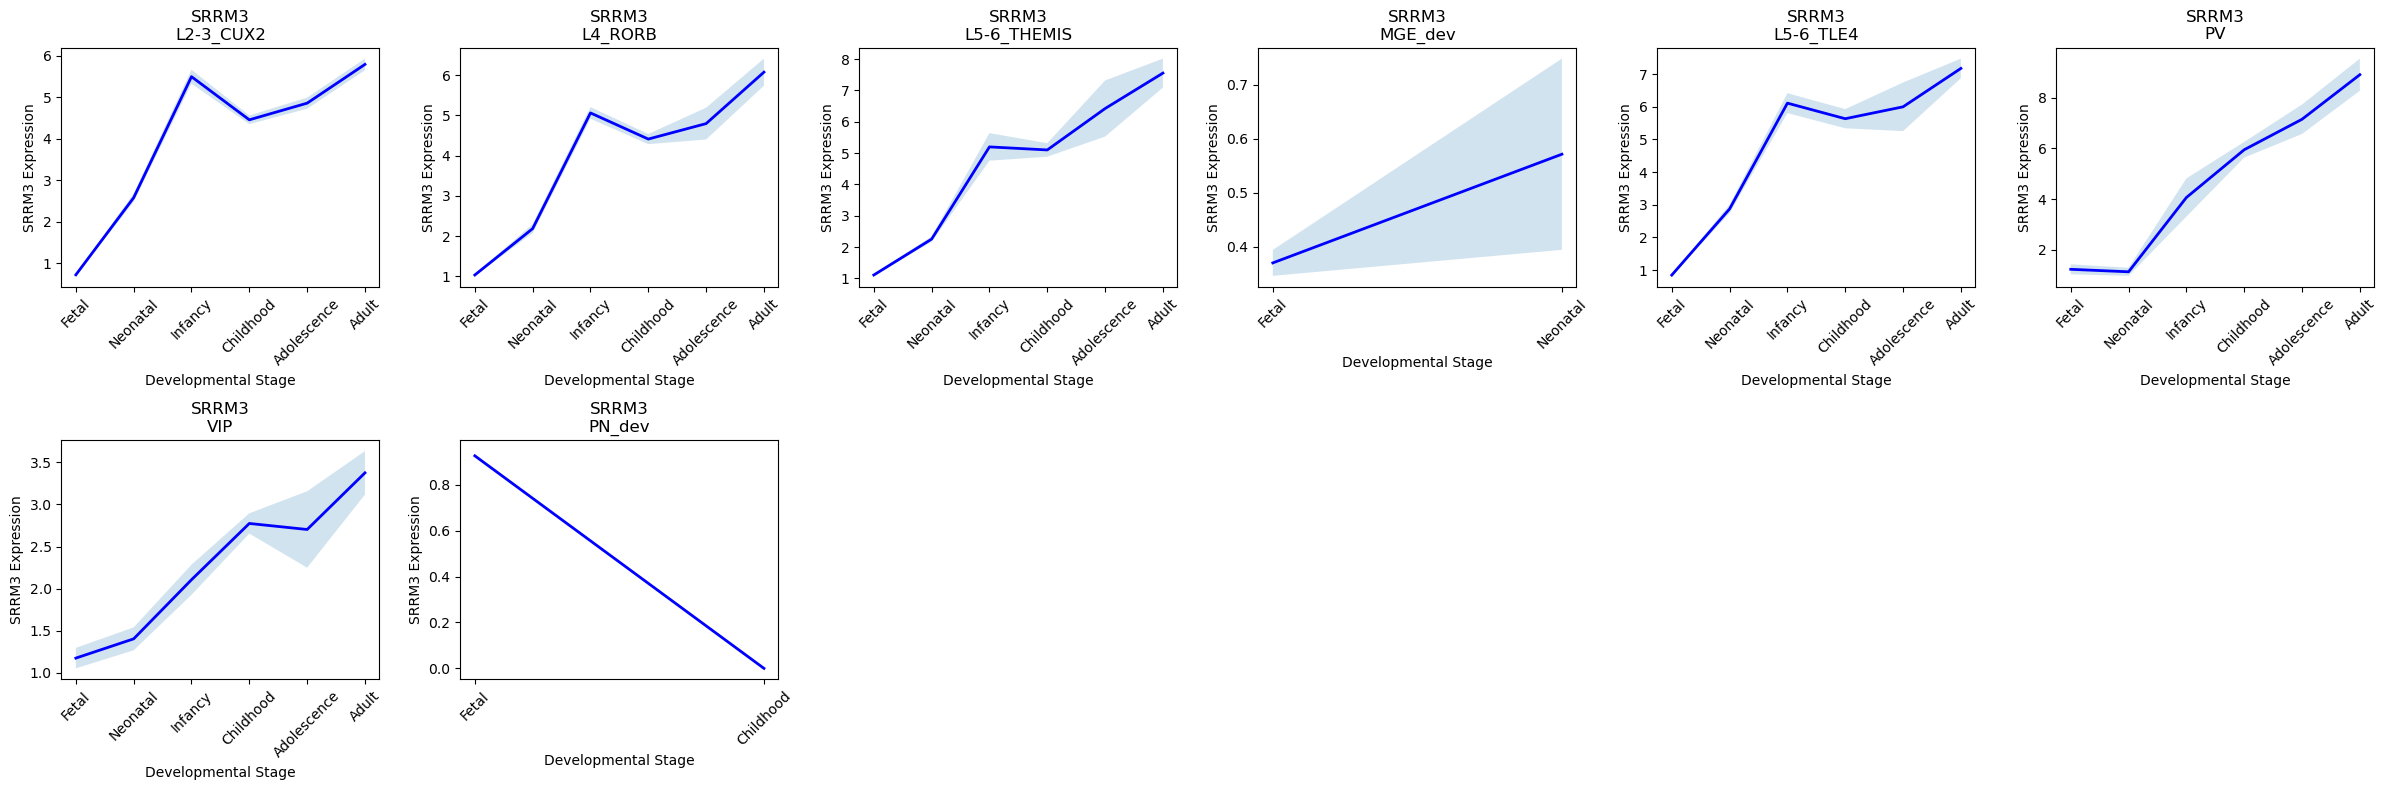

In [37]:
fig = plot_gene_trajectories(adata, ['SRRM3'], use_class="major_clust", cell_types=cell_types_major)
plt.show()

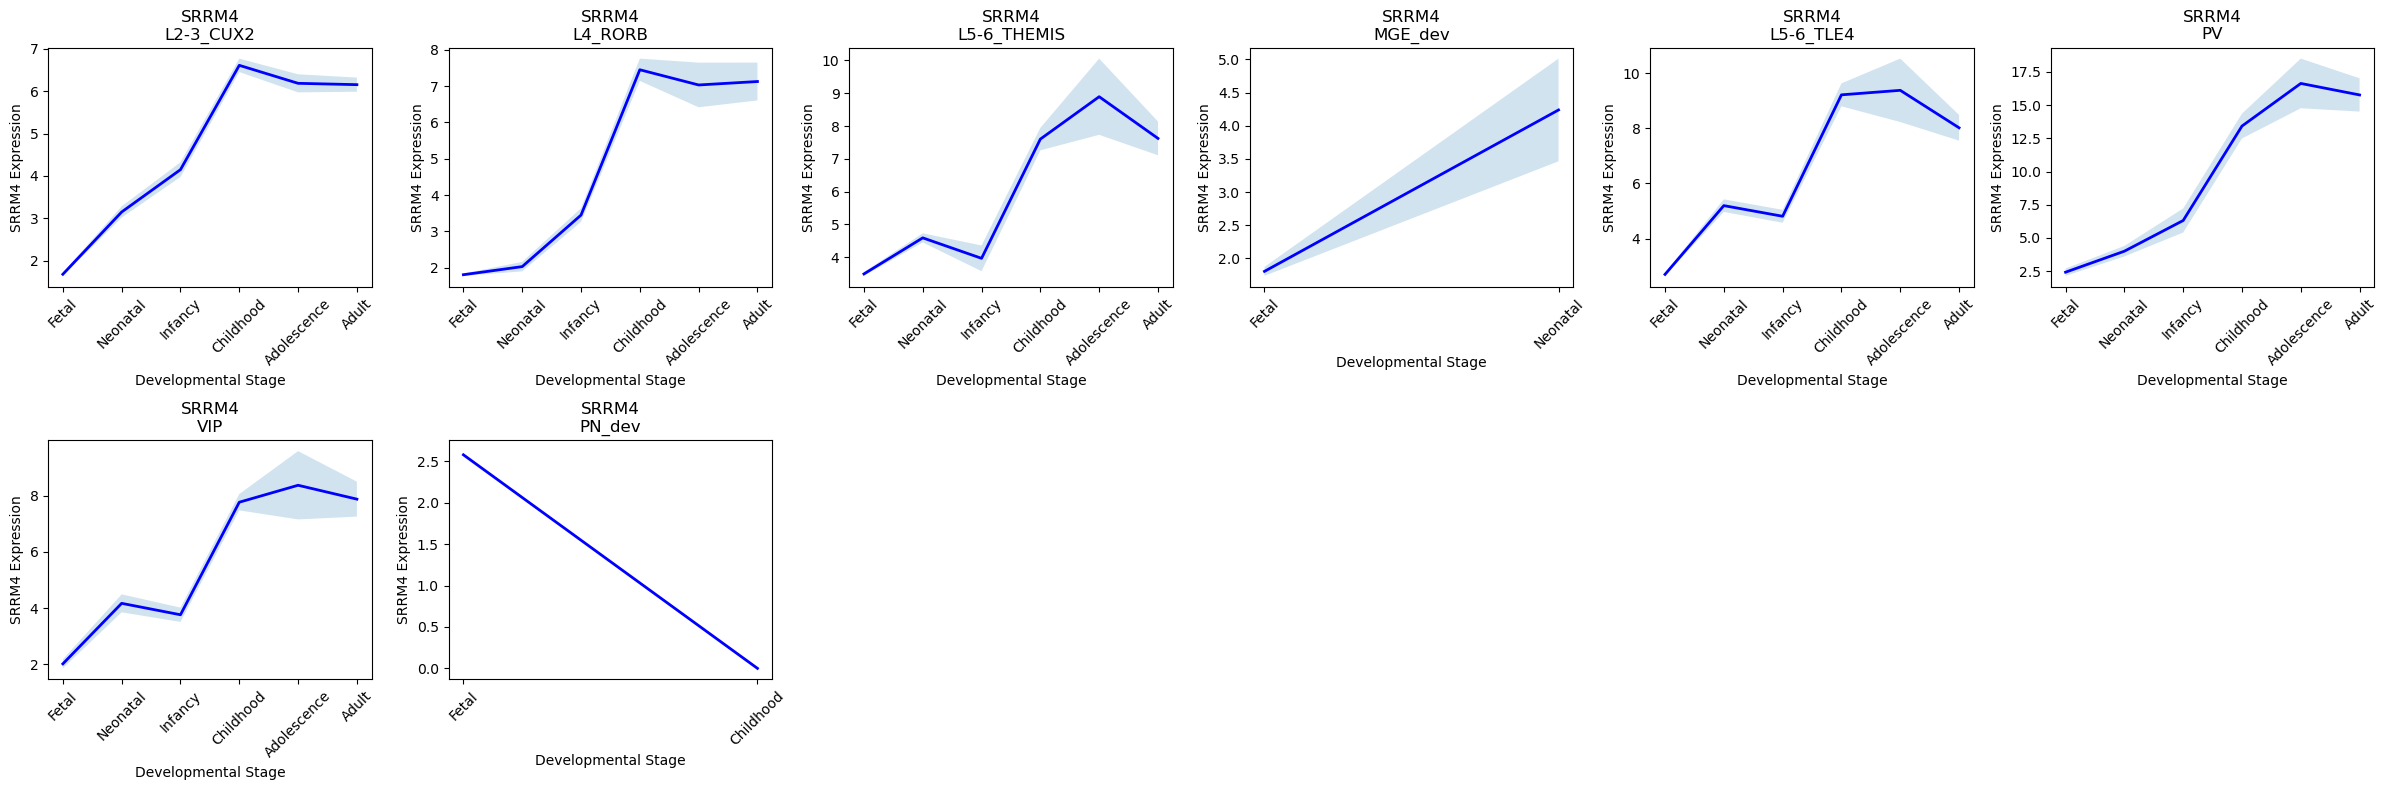

In [38]:
fig = plot_gene_trajectories(adata, ['SRRM4'], use_class="major_clust", cell_types=cell_types_major)
plt.show()

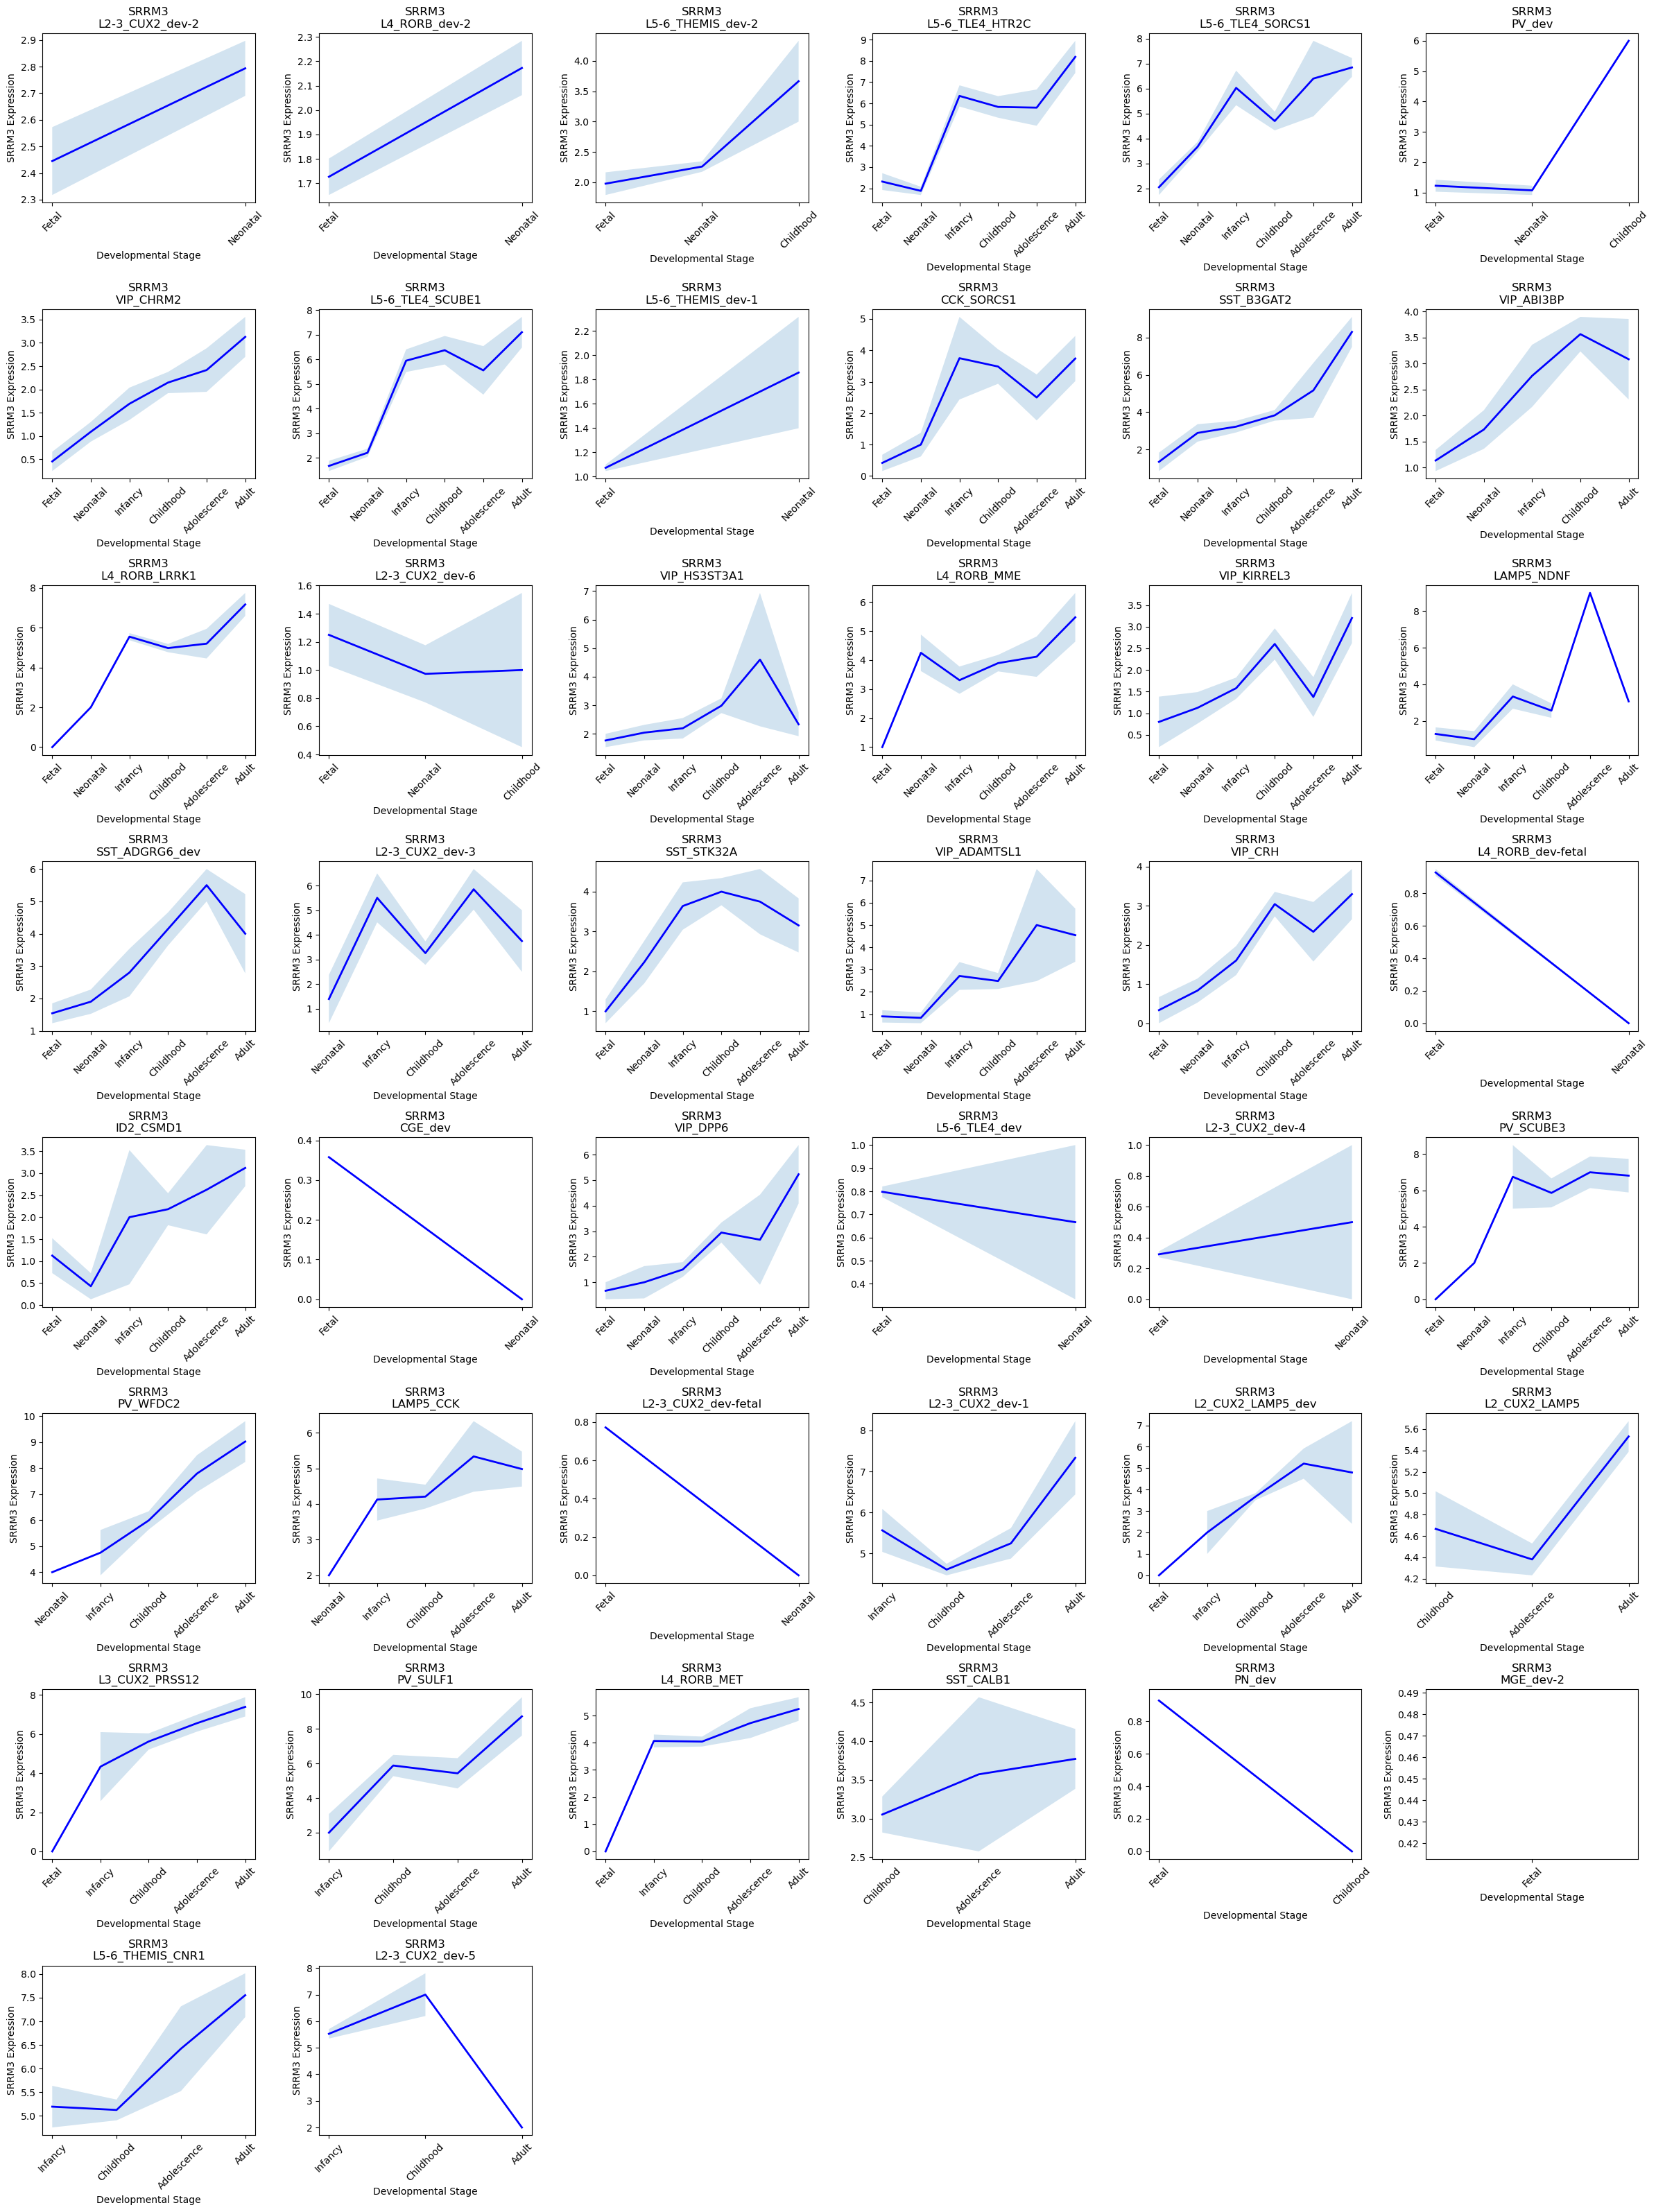

In [39]:
fig = plot_gene_trajectories(adata, ['SRRM3'], use_class="sub_clust", cell_types=cell_types_sub)
plt.show()

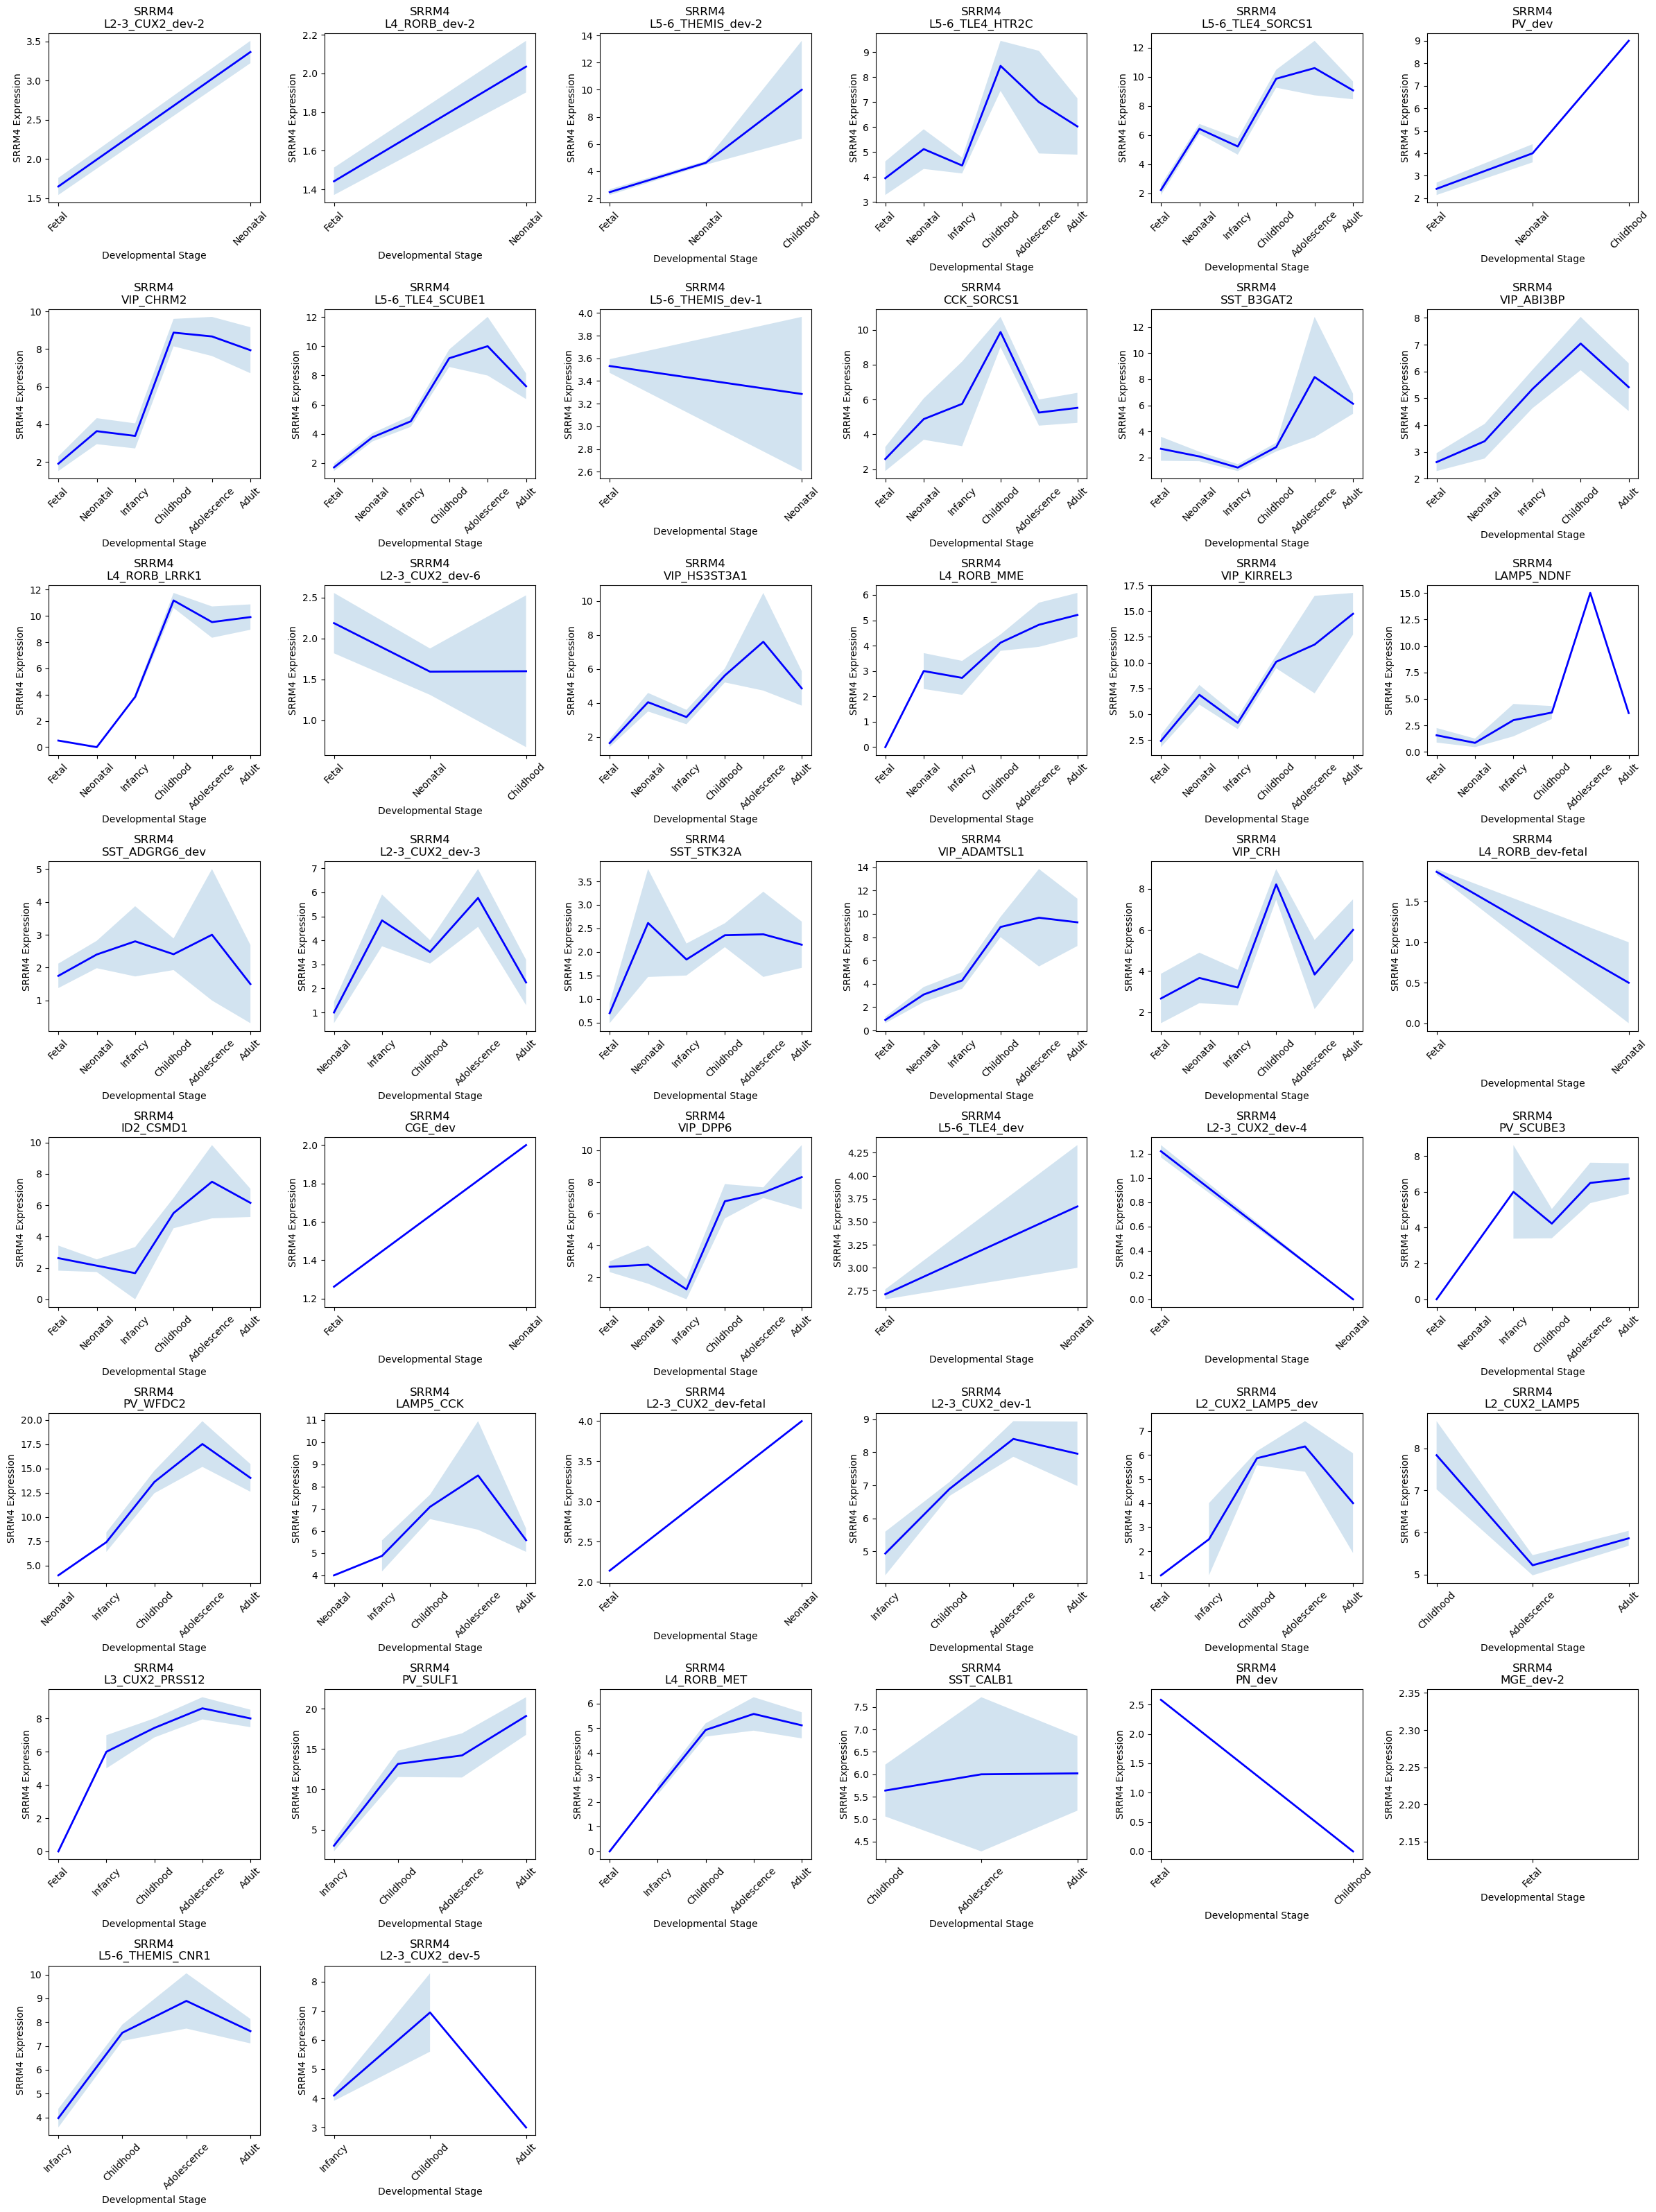

In [40]:
fig = plot_gene_trajectories(adata, ['SRRM4'], use_class="sub_clust", cell_types=cell_types_sub)
plt.show()

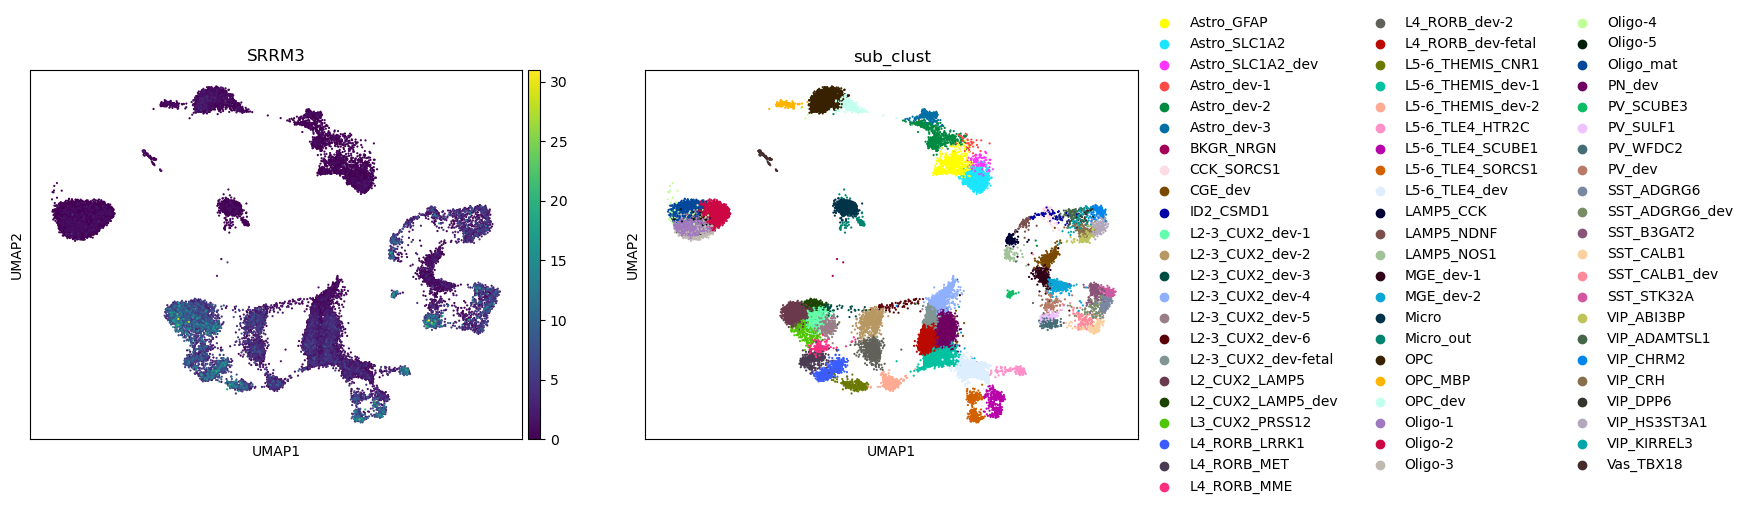

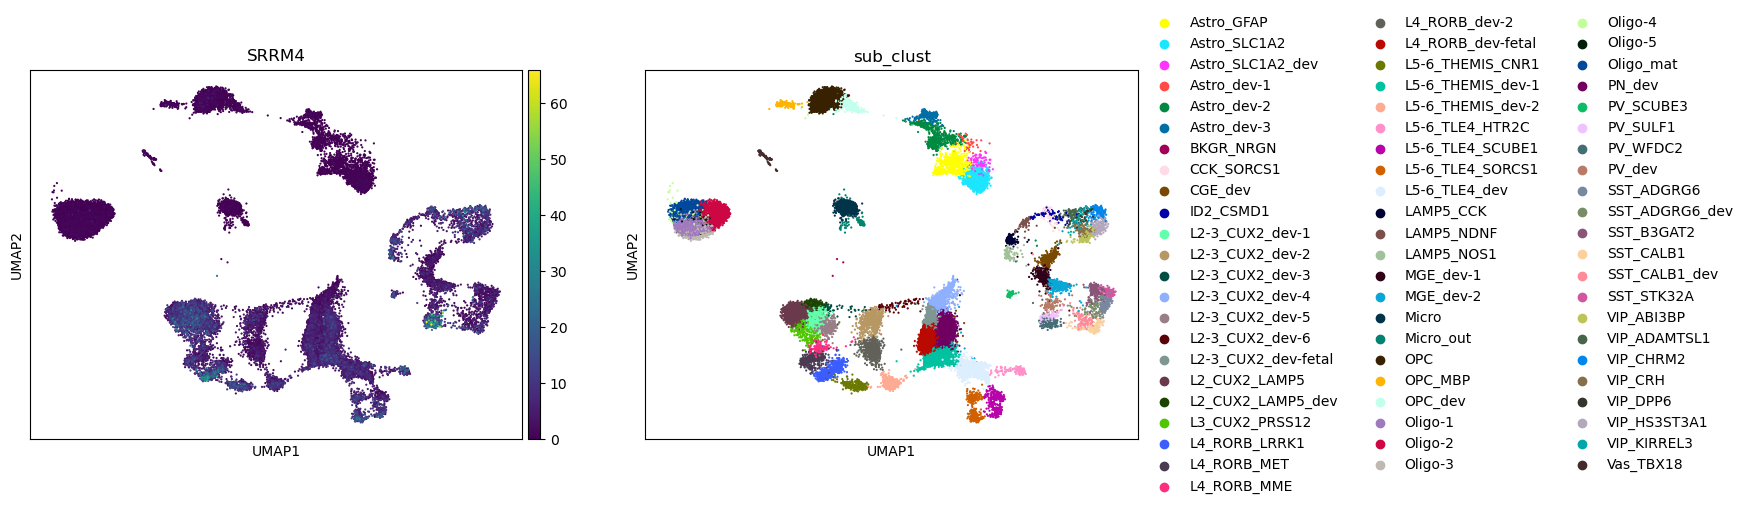

In [41]:
# Plot UMAP for each gene
for gene in genes_of_interest:
    sc.pl.umap(adata, color=[gene, 'sub_clust'], cmap='viridis', size=10)
    plt.show()

1. Progenitors (Neural stem/progenitor cells):
- MGE_dev (Medial Ganglionic Eminence progenitors)
- CGE_dev (Caudal Ganglionic Eminence progenitors) 
- PN_dev (Projection Neuron progenitors)

2. Excitatory Neurons:
- L2-3_CUX2 (Layer 2-3 CUX2-expressing pyramidal neurons)
- L4_RORB (Layer 4 RORB-expressing pyramidal neurons)
- L5-6_THEMIS (Layer 5-6 THEMIS-expressing pyramidal neurons)
- L5-6_TLE4 (Layer 5-6 TLE4-expressing pyramidal neurons)

3. Inhibitory Neurons:
- LAMP5_NOS1 (LAMP5/NOS1-expressing interneurons)
- PV (Parvalbumin-expressing interneurons)
- PV_SCUBE3 (SCUBE3-expressing subtype of PV interneurons)
- SST (Somatostatin-expressing interneurons)
- VIP (Vasoactive Intestinal Peptide-expressing interneurons)
- ID2 (ID2-expressing interneurons)

Excluded from list:
- Oligo (Oligodendrocytes)
- Astro (Astrocytes)
- Micro (Microglia)
- OPC (Oligodendrocyte Precursor Cells)
- Vas (Vascular cells)
- Poor-Quality (Low quality cells)


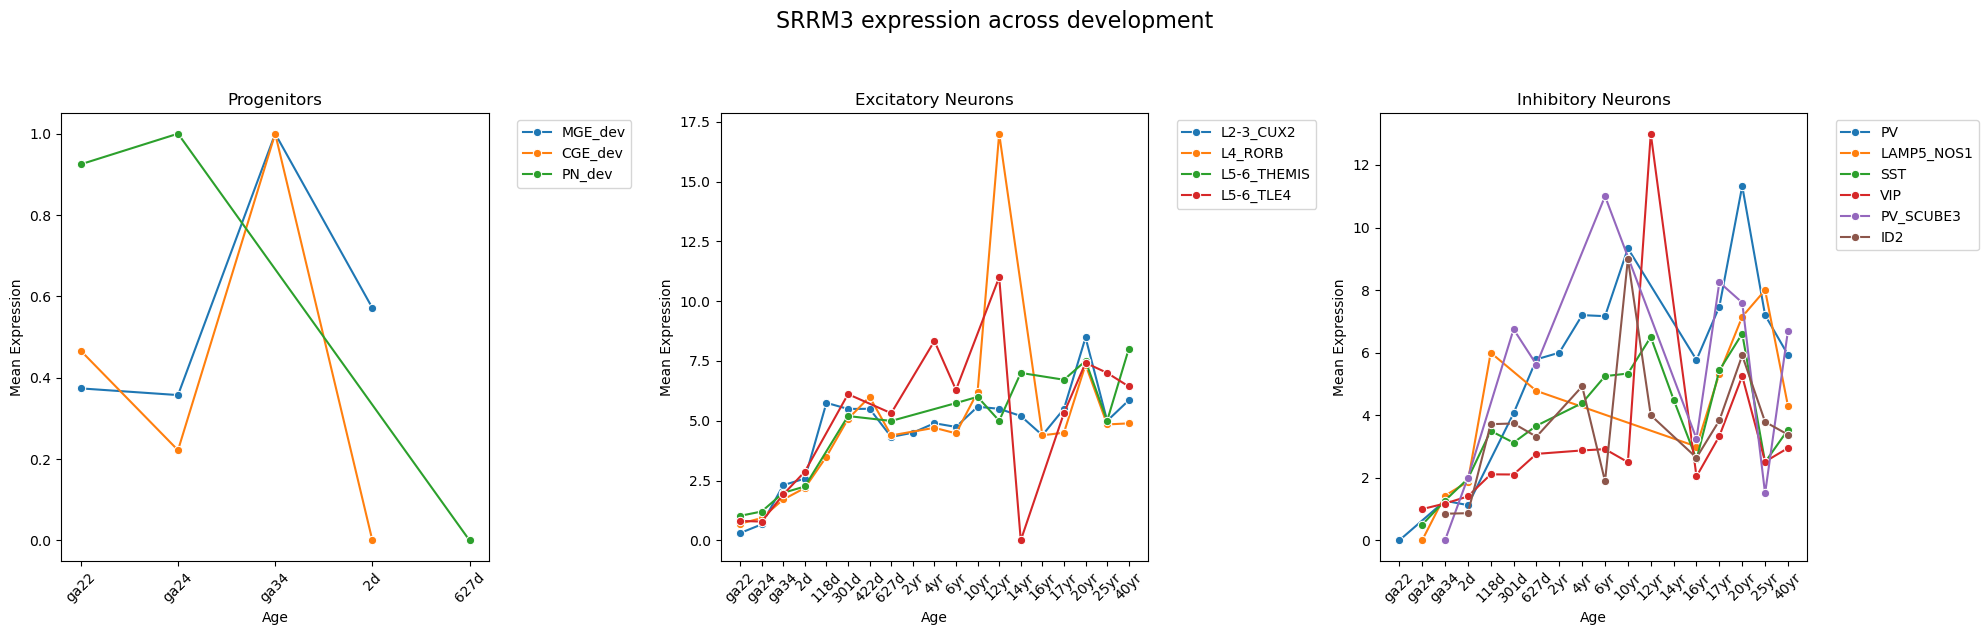

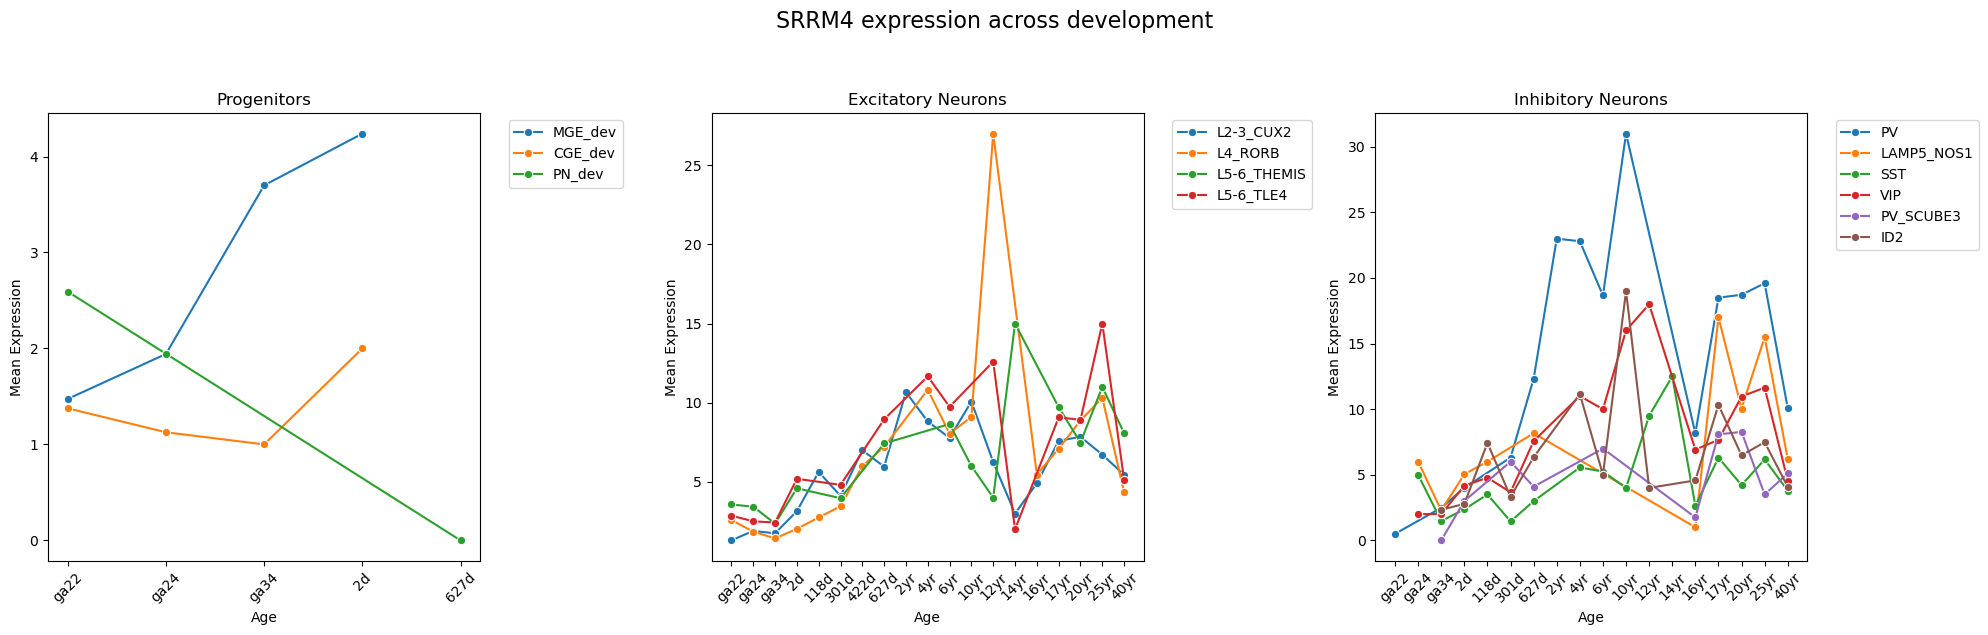

In [49]:
# Define neuronal cell types of interest
neuron_types = [
    # Progenitors
    'MGE_dev', 'CGE_dev', 'PN_dev',  
    
    # Excitatory neurons
    'L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'L5-6_TLE4',  
    
    # Inhibitory neurons
    'LAMP5_NOS1', 'PV', 'SST', 'VIP', 'PV_SCUBE3', 'ID2'
]

# Create separate lists for each category
progenitors = ['MGE_dev', 'CGE_dev', 'PN_dev']
excitatory = ['L2-3_CUX2', 'L4_RORB', 'L5-6_THEMIS', 'L5-6_TLE4']
inhibitory = ['LAMP5_NOS1', 'PV', 'SST', 'VIP', 'PV_SCUBE3', 'ID2']

cell_groups = [
    ('Progenitors', progenitors),
    ('Excitatory Neurons', excitatory),
    ('Inhibitory Neurons', inhibitory)
]

# Get unique ages and sort them
unique_ages = list(adata.obs.age.unique())
age_list = sorted(unique_ages, key=convert_age_to_days)

# Color palette for different cell types
colors = sns.color_palette("husl", len(neuron_types))
cell_type_colors = dict(zip(neuron_types, colors))


for gene in genes_of_interest:
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))
    fig.suptitle(f'{gene} expression across development', fontsize=16, y=1.05)
    
    for idx, (group_name, cell_types) in enumerate(cell_groups):
        # Calculate mean expression
        df = calculate_mean_expression(adata, gene, cell_types)
        
        # Create line plot
        sns.lineplot(data=df, x='Age', y='Mean_Expression', 
                    hue='Cell_Type', marker='o',
                    ax=axes[idx])
        
        axes[idx].set_title(group_name)
        axes[idx].set_xlabel('Age')
        axes[idx].set_ylabel('Mean Expression')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Add legend
        axes[idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()

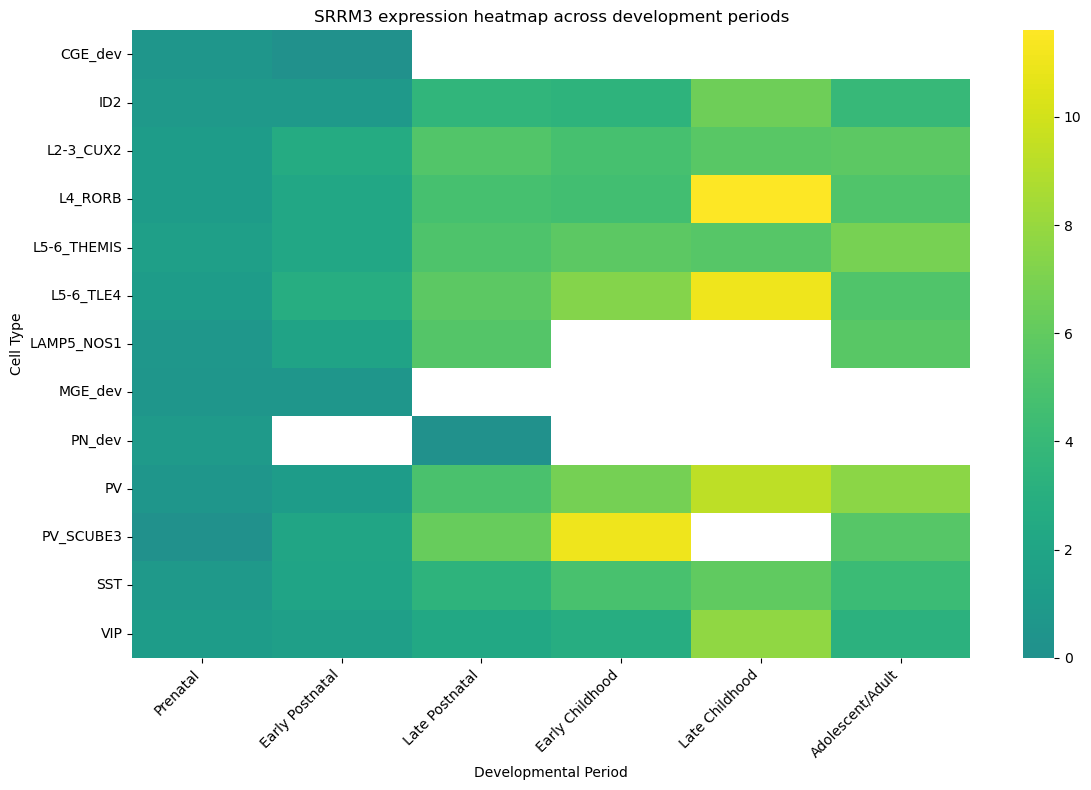

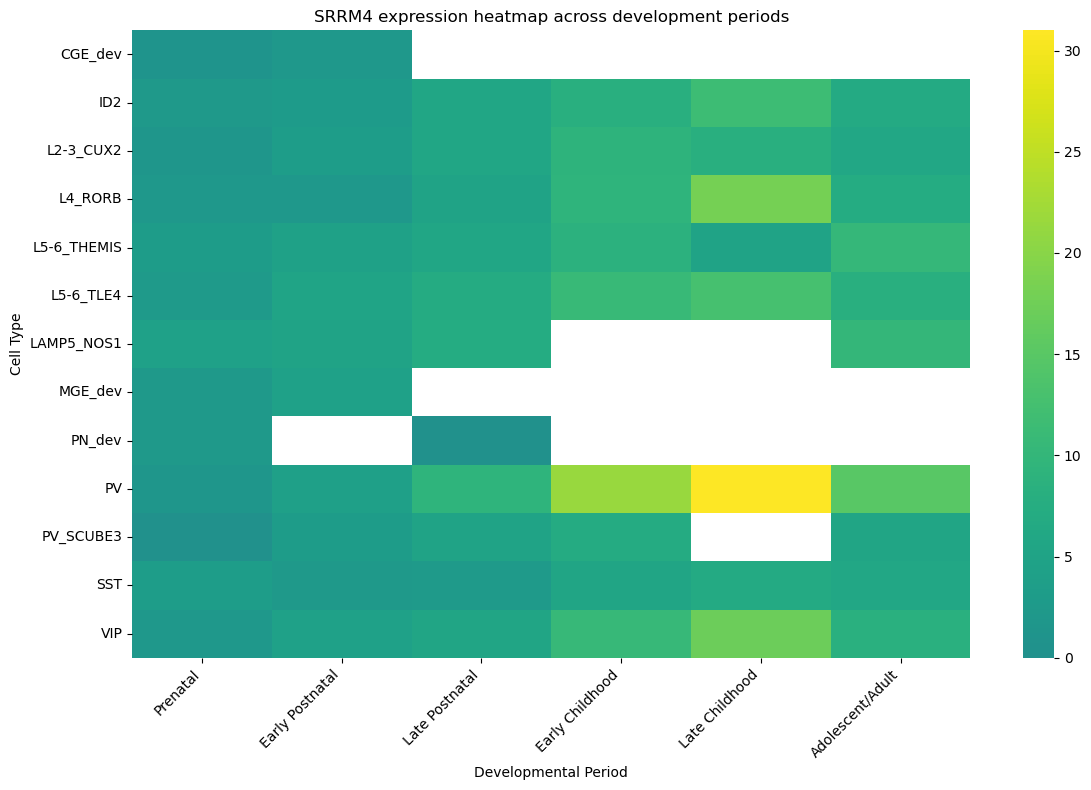

In [50]:
# Create heatmap visualization with grouped ages
for gene in genes_of_interest:
    df = calculate_mean_expression(adata, gene, neuron_types)
    
    # Add age group column
    df['Age_Group'] = df['Age'].apply(assign_age_group)
    
    # Calculate mean expression for each cell type and age group
    grouped_df = df.groupby(['Cell_Type', 'Age_Group'])['Mean_Expression'].mean().reset_index()
    
    # Create pivot table with age groups
    pivot_df = grouped_df.pivot(index='Cell_Type', 
                              columns='Age_Group', 
                              values='Mean_Expression')
    
    # Define the correct order of age groups
    age_group_order = ['Prenatal', 'Early Postnatal', 'Late Postnatal', 
                      'Early Childhood', 'Late Childhood', 'Adolescent/Adult']
    
    # Reorder columns
    pivot_df = pivot_df[age_group_order]
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, cmap='viridis', center=0,
                xticklabels=True, yticklabels=True)
    plt.title(f'{gene} expression heatmap across development periods')
    plt.xlabel('Developmental Period')
    plt.ylabel('Cell Type')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()